In [1]:
pip install scanpy -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install igraph -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install louvain -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas -q

Note: you may need to restart the kernel to use updated packages.


In [5]:
import scanpy as sc
import pandas as pd
import math
import matplotlib.pyplot as plt

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
adata = sc.read_h5ad('AnnDataObject.h5ad')

In [8]:
mask = adata.obs['sample'] != 'control'
adata = adata[mask, :]

# Quality Control

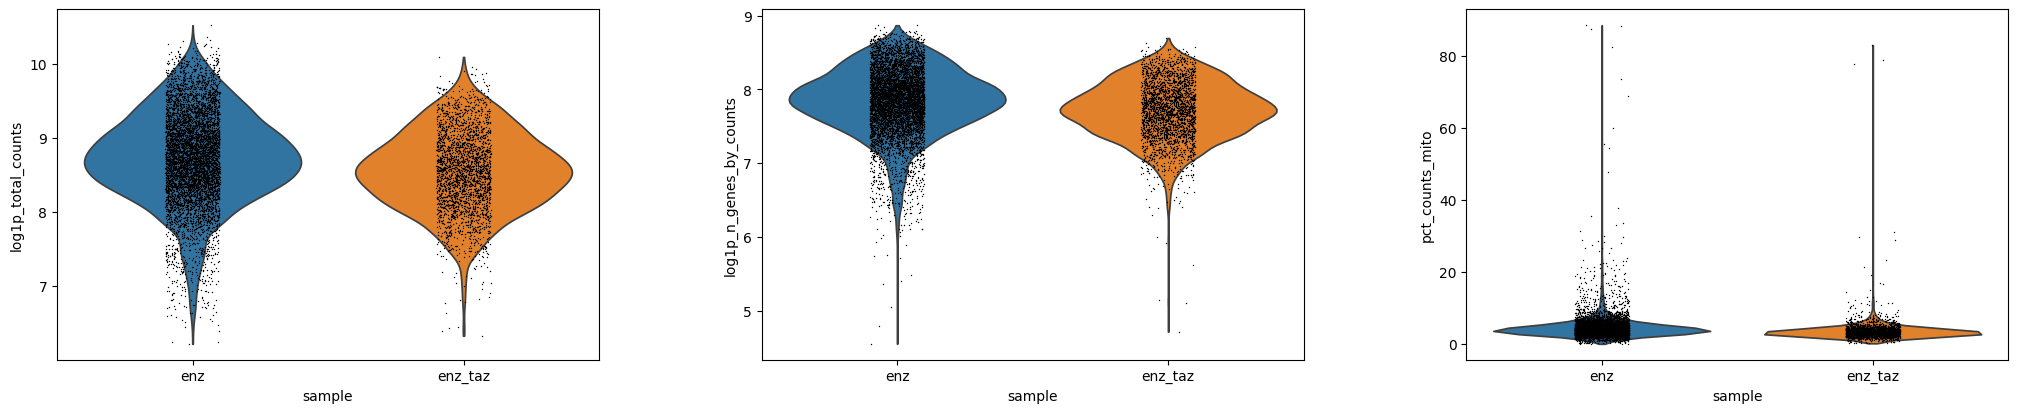

In [9]:
# Violin - genotype - log
sc.pl.violin(
  adata,
  keys=['log1p_total_counts', 'log1p_n_genes_by_counts', 'pct_counts_mito'],
  groupby='sample',
  save='-genotype-log.png'
)

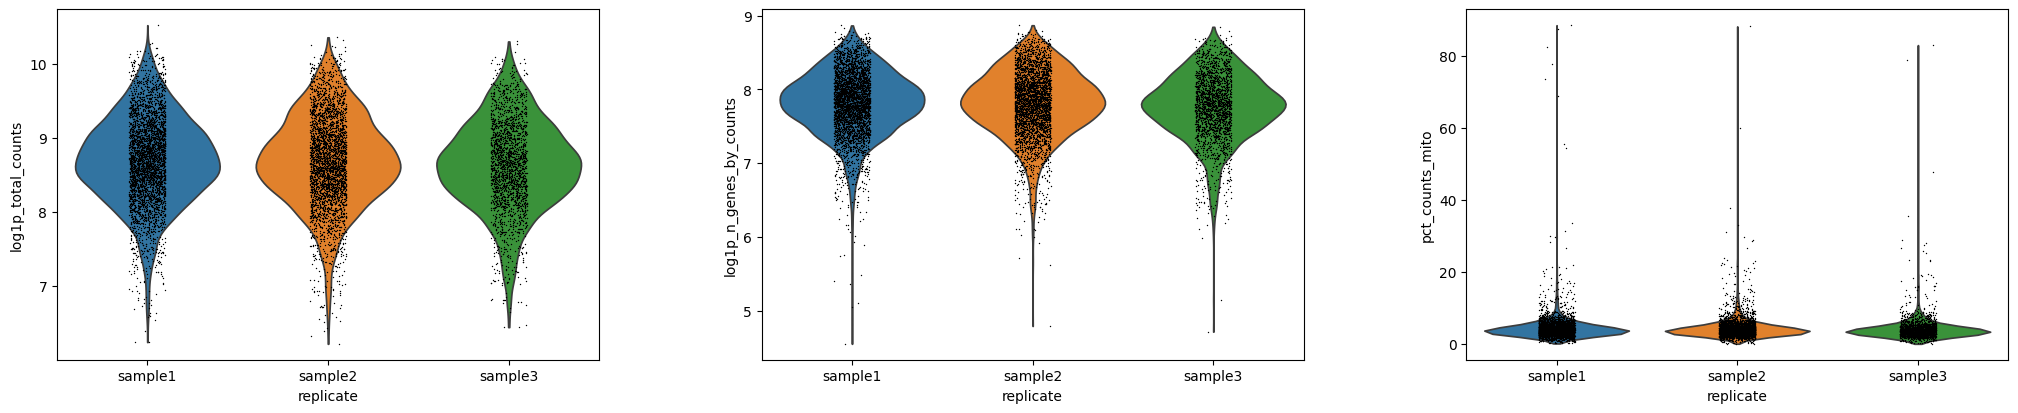

In [10]:
# Violin - sex - log
sc.pl.violin(
  adata,
  keys=['log1p_total_counts', 'log1p_n_genes_by_counts', 'pct_counts_mito'],
  groupby='replicate',
  save='-sex-log.png'
)

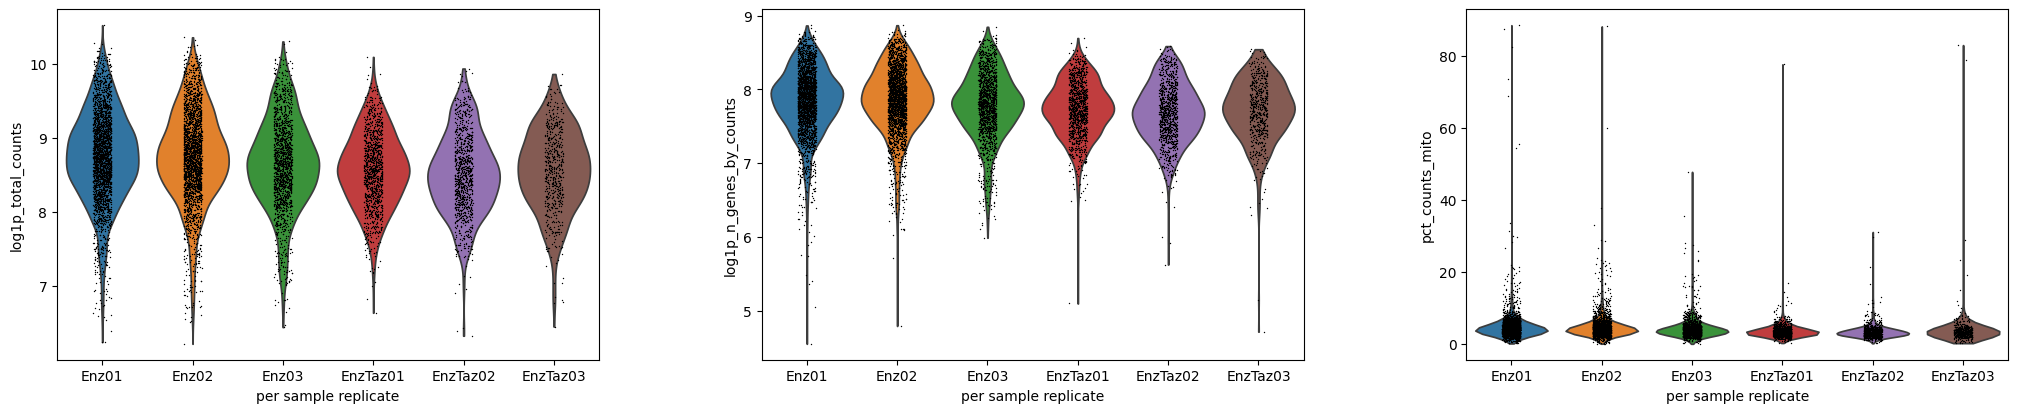

In [11]:
# Violin - sex - log
sc.pl.violin(
  adata,
  keys=['log1p_total_counts', 'log1p_n_genes_by_counts', 'pct_counts_mito'],
  groupby='per_sample_replicate',
  save='-sex-log.png'
)

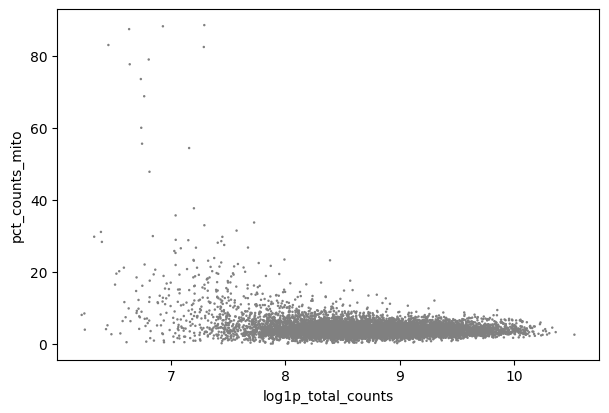

In [12]:
# Scatter - mito x UMIs
sc.pl.scatter(
  adata,
  x='log1p_total_counts',
  y='pct_counts_mito',
  save='-mitoxUMIs.png'
)

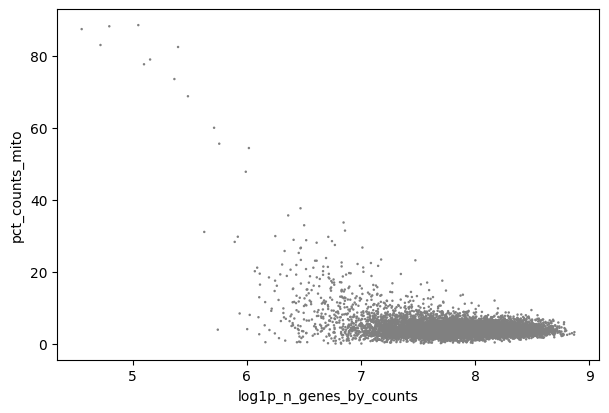

In [13]:
# Scatter - mito x genes
sc.pl.scatter(
  adata,
  x='log1p_n_genes_by_counts',
  y='pct_counts_mito',
  save='-mitoxgenes.png'
)

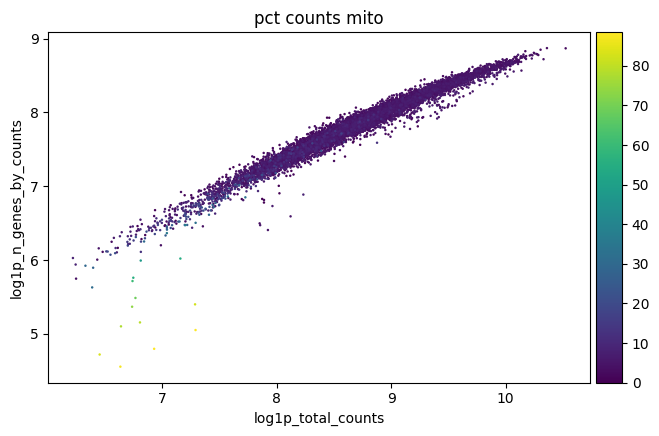

In [14]:
# Scatter - genes x UMIs
sc.pl.scatter(
  adata,
  x='log1p_total_counts',
  y='log1p_n_genes_by_counts',
  color='pct_counts_mito',
  save='-genesxUMIs.png'
)

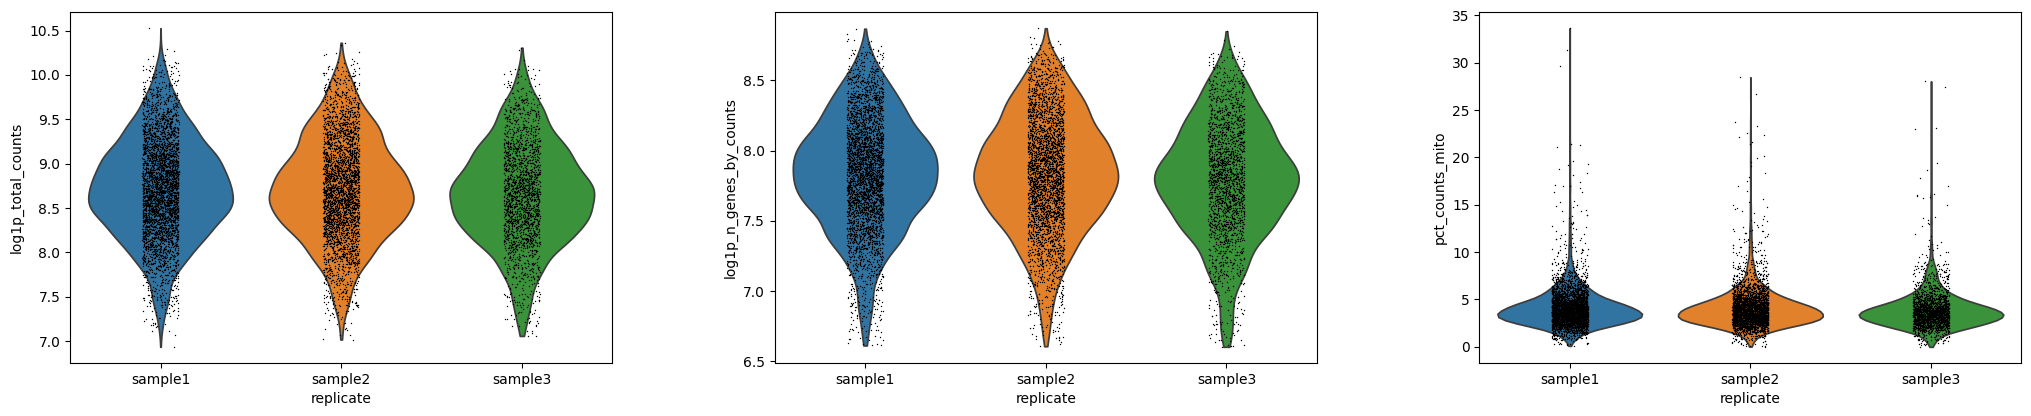

In [15]:
genes_filtered_obj = adata[adata.obs['log1p_n_genes_by_counts'] >= 6.6]
#genes_filtered_obj = genes_filtered_obj[genes_filtered_obj.obs['log1p_n_genes_by_counts'] <= 20.0]

# Violin - Filterbygenes
sc.pl.violin(
  genes_filtered_obj,
  keys=['log1p_total_counts', 'log1p_n_genes_by_counts', 'pct_counts_mito'],
  groupby='replicate',
  save='-Filterbygenes.png'
)

In [16]:
# 17051 × 36601
print(genes_filtered_obj)

View of AnnData object with n_obs × n_vars = 9400 × 36601
    obs: 'batch', 'sample', 'replicate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'n_genes', 'pct_counts_in_top_50_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'per_sample_replicate'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'n_cells', 'mito'
    uns: 'sample_colors', 'replicate_colors', 'per_sample_replicate_colors'


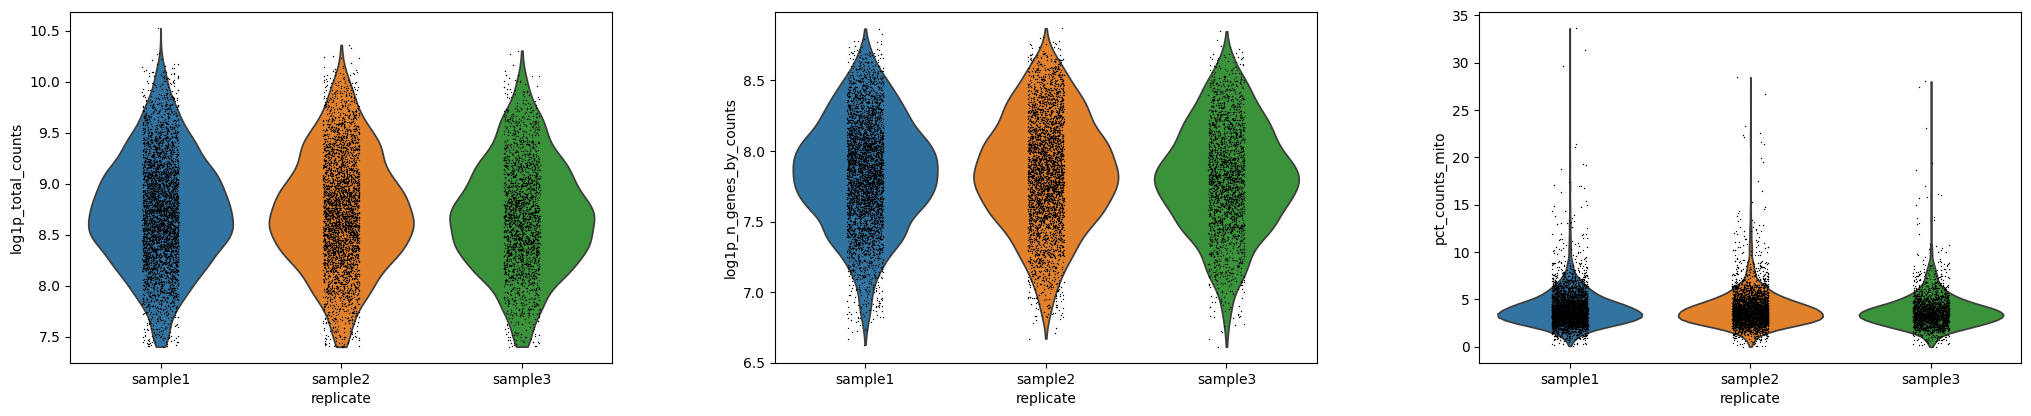

In [17]:
counts_filtered_obj = genes_filtered_obj[genes_filtered_obj.obs['log1p_total_counts'] >=  7.4]
counts_filtered_obj = counts_filtered_obj[counts_filtered_obj.obs['log1p_total_counts'] <= 10.6]

# Violin - Filterbycounts
sc.pl.violin(
  counts_filtered_obj,
  keys=['log1p_total_counts', 'log1p_n_genes_by_counts', 'pct_counts_mito'],
  groupby='replicate',
  save='-Filterbycounts.png'
)

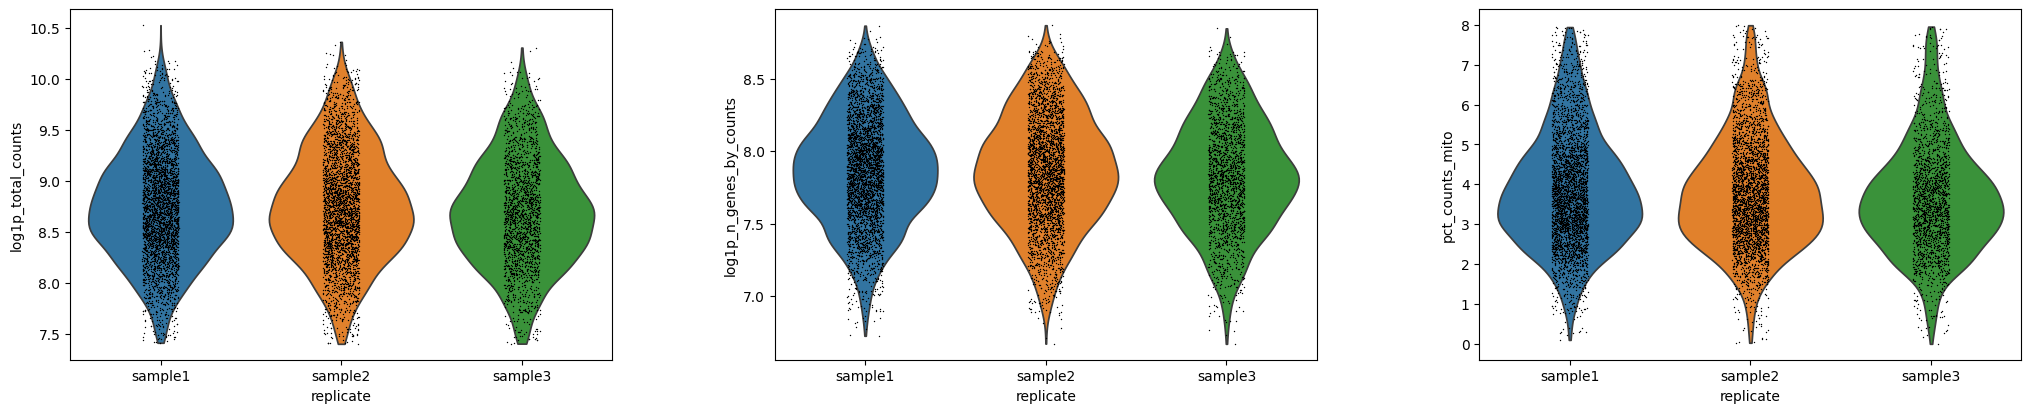

In [18]:
mito_filtered_obj = counts_filtered_obj[counts_filtered_obj.obs['pct_counts_mito'] >=  0]
mito_filtered_obj = mito_filtered_obj[mito_filtered_obj.obs['pct_counts_mito'] <= 8]

# Violin - Filterbymito
sc.pl.violin(
  mito_filtered_obj,
  keys=['log1p_total_counts', 'log1p_n_genes_by_counts', 'pct_counts_mito'],
  groupby='replicate',
  save='-Filterbymito.png'
)

In [19]:
filtered_obj = genes_filtered_obj.copy()

sc.pp.filter_genes(filtered_obj, min_cells=3)
sc.pp.filter_genes(filtered_obj, max_cells=1000000000)

#16803 × 36601
print(filtered_obj)

AnnData object with n_obs × n_vars = 9400 × 25632
    obs: 'batch', 'sample', 'replicate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'n_genes', 'pct_counts_in_top_50_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'per_sample_replicate'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'n_cells', 'mito'
    uns: 'sample_colors', 'replicate_colors', 'per_sample_replicate_colors'


# Normalise Data

In [20]:
output_h5ad = filtered_obj.copy()
sc.pp.normalize_total(output_h5ad)

In [21]:
output_h5ad = sc.pp.log1p(output_h5ad, copy=True)  # below function requires log scaled data
sc.pp.highly_variable_genes(output_h5ad)

# Clustering - PCA Components

In [22]:
scaled_data = sc.pp.scale(output_h5ad, max_value=10.0, copy=True)

In [23]:
pca_components = sc.tl.pca(scaled_data, n_comps=50, copy=True)

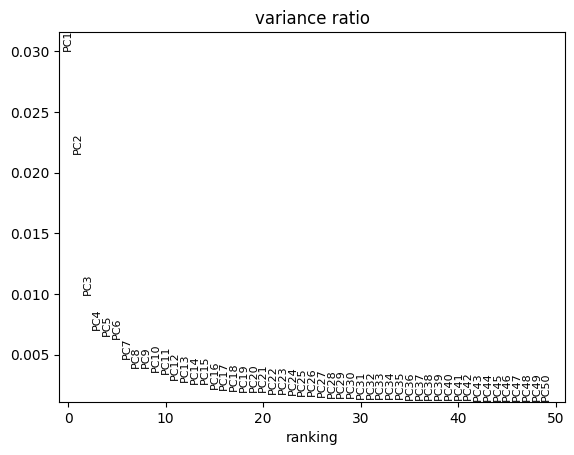

In [24]:
sc.pl.pca_variance_ratio(pca_components, n_pcs=50, save='-variance-ratio.png')

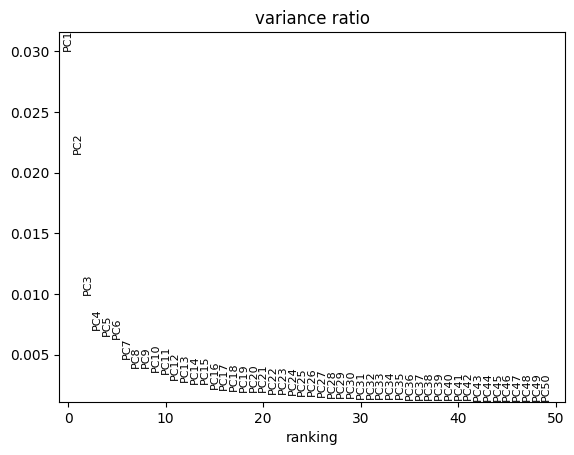

In [25]:
sc.pl.pca_variance_ratio(pca_components, n_pcs=50, save='-variance-ratio.png')

In [26]:
neighbours = sc.pp.neighbors(pca_components, n_neighbors=15, use_rep='X_pca', n_pcs=25, copy=True)

2025-03-16 18:06:33.620877: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-16 18:06:33.639362: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-16 18:06:33.639378: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-16 18:06:33.639390: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-16 18:06:33.643223: I tensorflow/core/platform/cpu_feature_g

In [27]:
tsne_components = sc.tl.tsne(neighbours, use_rep='X_pca', perplexity=30, copy=True)

In [28]:
umap_components = sc.tl.umap(tsne_components, copy=True)

# Find Clusters

In [29]:
# Find Clusters
clusters = sc.tl.louvain(umap_components, resolution=0.6, copy=True)

In [30]:
markers_cluster = sc.tl.rank_genes_groups(clusters, groupby="louvain", method='t-test_overestim_var', n_genes=100, copy=True)

In [31]:
markers_genotype = sc.tl.rank_genes_groups(markers_cluster, groupby="sample", method='t-test_overestim_var', n_genes=100, copy=True)

In [32]:
def generate_marker_table(adata):
    # extract marker table metadata
    res = adata.uns['rank_genes_groups']

    # generate DataFrame from metadata
    res_df = pd.DataFrame({
                "genes": pd.DataFrame(res["names"]).stack(),
                "scores": pd.DataFrame(res["scores"]).stack(),
                "logfoldchanges": pd.DataFrame(res["logfoldchanges"]).stack(),
                "pvals": pd.DataFrame(res["pvals"]).stack(),
                "pvals_adj": pd.DataFrame(res["pvals_adj"]).stack(),
            })

    # convert row names to columns
    res_df.index.name = 'newhead'
    res_df.reset_index(inplace=True)

    # rename generic column names
    res_df = res_df.rename(columns={'level_0': 'rank', 'level_1':'cluster'})

    # reorder columns
    res_df = res_df.reindex(columns=['cluster', 'rank', 'genes', 'scores', 'logfoldchanges', 'pvals', 'pvals_adj'])

    # insert ref column
    res_df.insert(2, 'ref', 'rest')

    return res_df

In [33]:
# Generate marker tables
cluster_marker_table = generate_marker_table(markers_cluster)
genotype_marker_table = generate_marker_table(markers_genotype)

display(cluster_marker_table.head(4))
display(genotype_marker_table.head(4))

,cluster,rank,ref,genes,scores,logfoldchanges,pvals,pvals_adj
0,0,0,rest,GDF15,19.109770,NaN,1.327581e-78,3.402855e-74
1,1,0,rest,RPS27,21.406527,NaN,5.631485e-94,7.217311e-90
2,2,0,rest,NAALADL2,34.450089,NaN,3.221091e-218,8.256301e-214
3,3,0,rest,MIF,28.738058,NaN,3.526347e-144,9.038732e-140


,cluster,rank,ref,genes,scores,logfoldchanges,pvals,pvals_adj
0,enz,0,rest,MT-CYB,47.776749,NaN,0.000000e+00,0.000000e+00
1,enz_taz,0,rest,MT-ATP8,25.665659,NaN,3.798794e-137,3.245689e-133
2,enz,1,rest,MT-CO3,41.992912,NaN,0.000000e+00,0.000000e+00
3,enz_taz,1,rest,HES1,24.220585,NaN,4.556179e-123,2.335679e-119


In [34]:
genotype_marker_table

,cluster,rank,ref,genes,scores,logfoldchanges,pvals,pvals_adj
0,enz,0,rest,MT-CYB,47.776749,NaN,0.000000e+00,0.000000e+00
1,enz_taz,0,rest,MT-ATP8,25.665659,NaN,3.798794e-137,3.245689e-133
2,enz,1,rest,MT-CO3,41.992912,NaN,0.000000e+00,0.000000e+00
3,enz_taz,1,rest,HES1,24.220585,NaN,4.556179e-123,2.335679e-119
4,enz,2,rest,MT-ATP6,40.292767,NaN,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
195,enz_taz,97,rest,NDUFA1,7.336806,NaN,2.516352e-13,2.999959e-11
196,enz,98,rest,PITPNA,11.850863,NaN,3.087264e-32,4.186918e-30
197,enz_taz,98,rest,RPS23,7.312984,NaN,3.002644e-13,3.530448e-11
198,enz,99,rest,LARP4B,11.823131,NaN,4.277757e-32,5.740705e-30


## Number of cells per cluster

In [59]:
clusters.obs['louvain'].value_counts()

0    2478
1    1830
2    1704
3     873
4     630
5     627
6     599
7     480
8     179
Name: louvain, dtype: int64

# Differential Expression Analysis

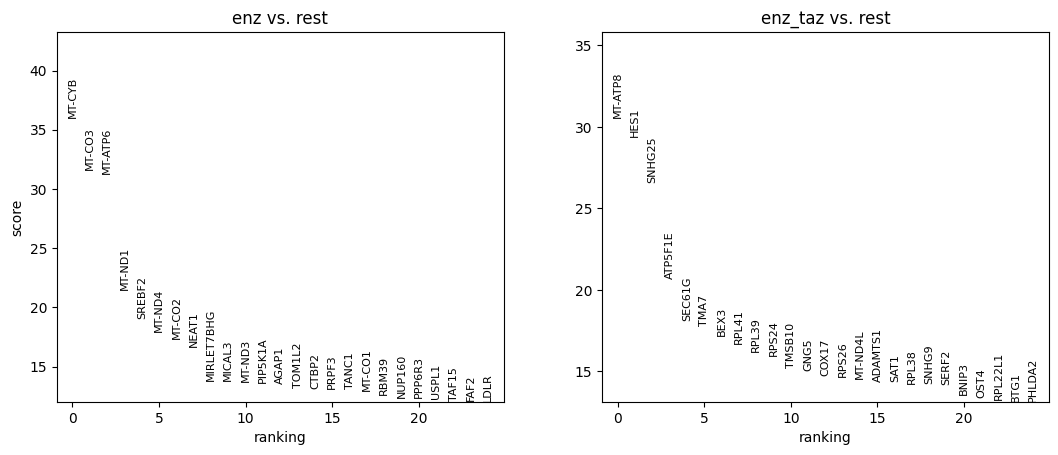

In [35]:
sc.tl.rank_genes_groups(clusters, groupby="sample", method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(clusters, n_genes=25, sharey=False, key = "t-test")

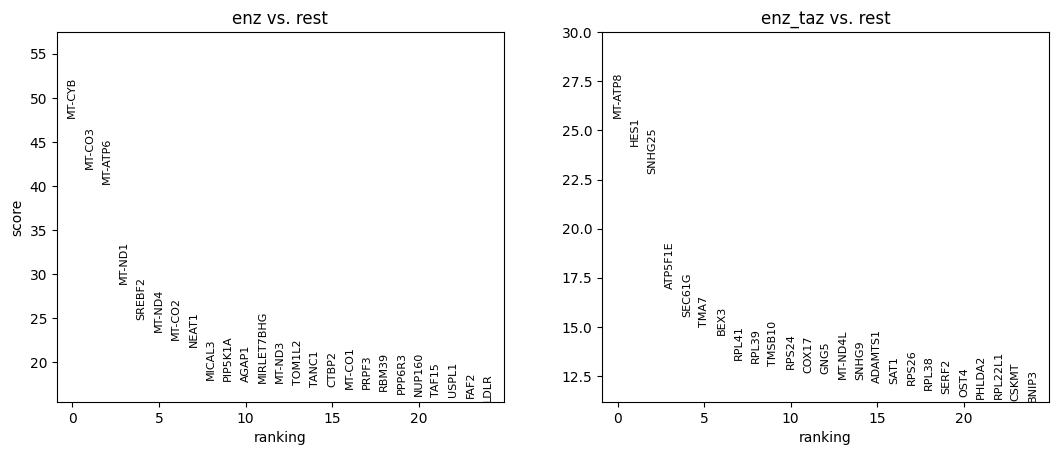

In [36]:
sc.tl.rank_genes_groups(clusters, groupby="sample", method='t-test_overestim_var', key_added = "t-test_ov")
sc.pl.rank_genes_groups(clusters, n_genes=25, sharey=False, key = "t-test_ov", save="_treatment.png")

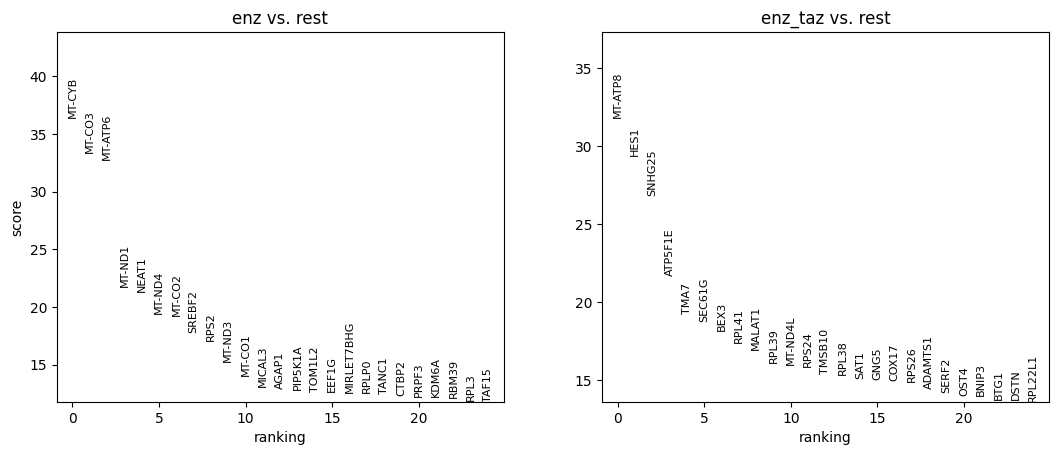

In [37]:
sc.tl.rank_genes_groups(clusters, groupby="sample", method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(clusters, n_genes=25, sharey=False, key="wilcoxon")

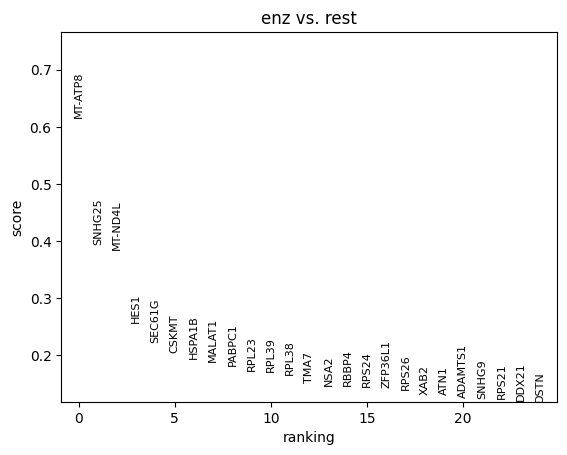

In [38]:
sc.tl.rank_genes_groups(clusters, groupby="sample", method='logreg',key_added = "logreg")
sc.pl.rank_genes_groups(clusters, n_genes=25, sharey=False, key = "logreg")

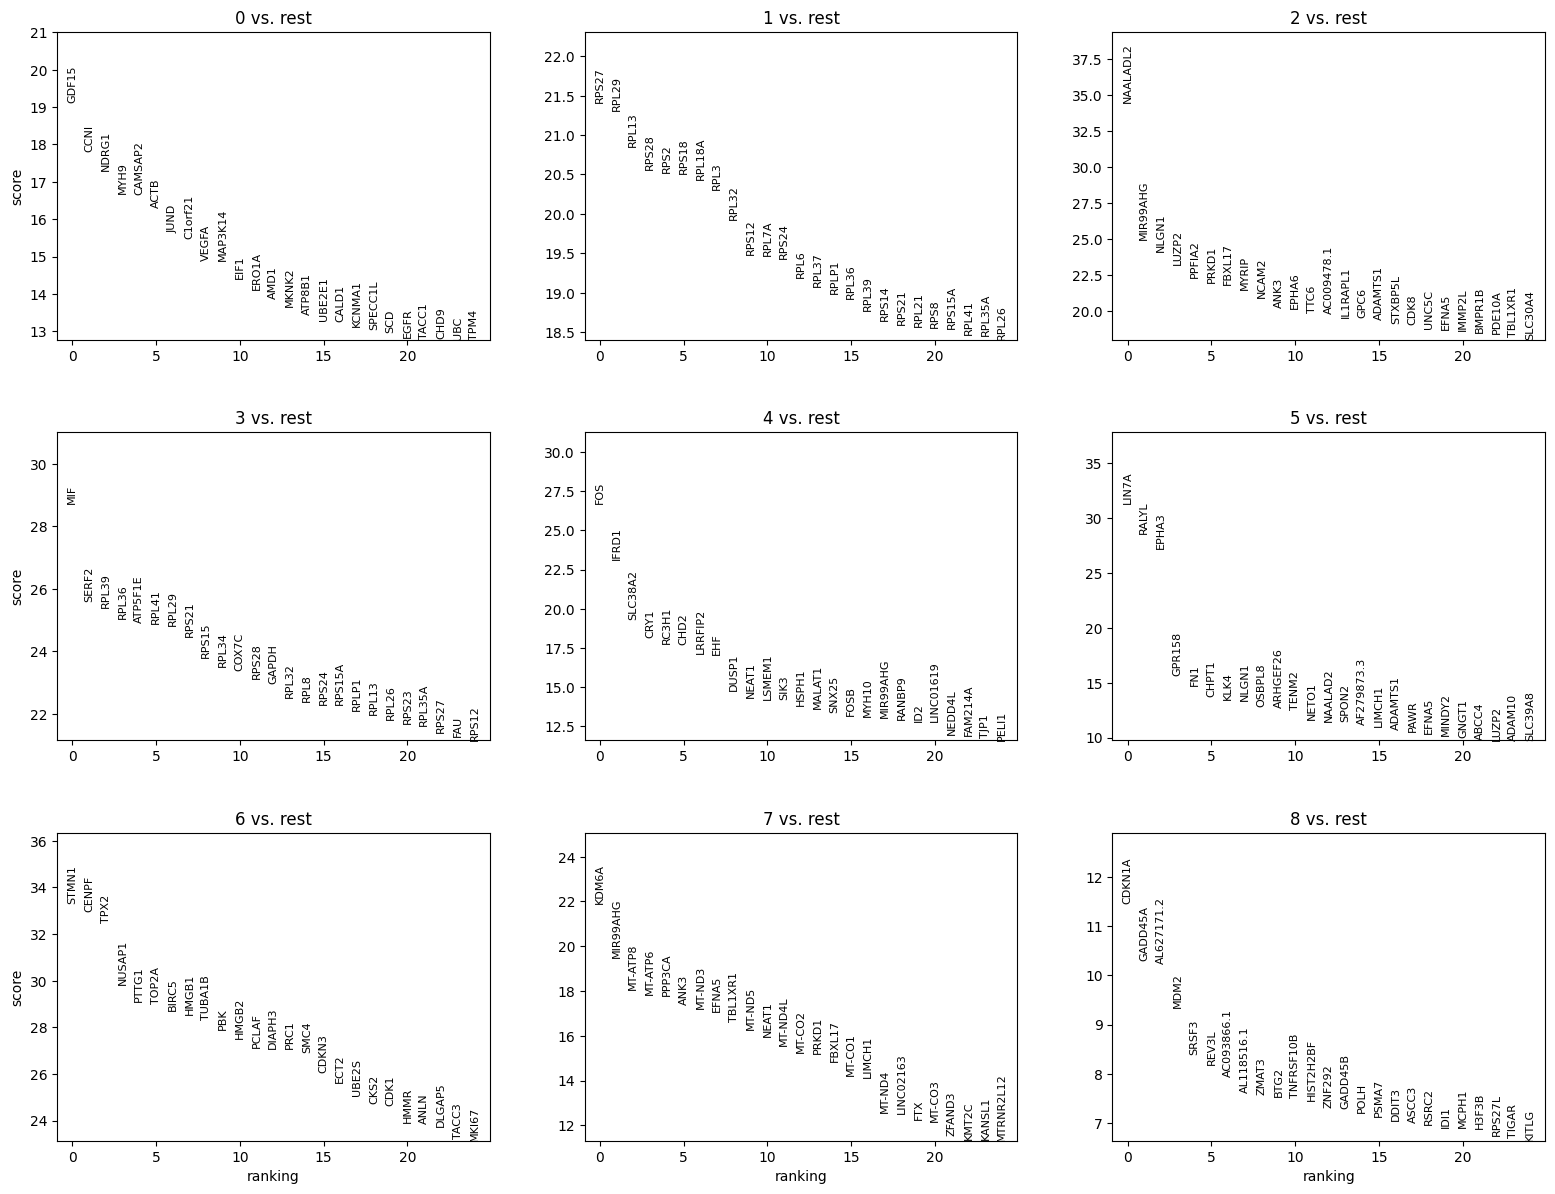

In [39]:
sc.tl.rank_genes_groups(clusters, groupby="louvain", method='t-test_overestim_var', key_added = "t-test_ov")
sc.pl.rank_genes_groups(clusters, n_genes=25, sharey=False, key = "t-test_ov", ncols=3, save='-clusters_deg.png')

categories: enz, enz_taz
var_group_labels: 0, 1, 2, etc.


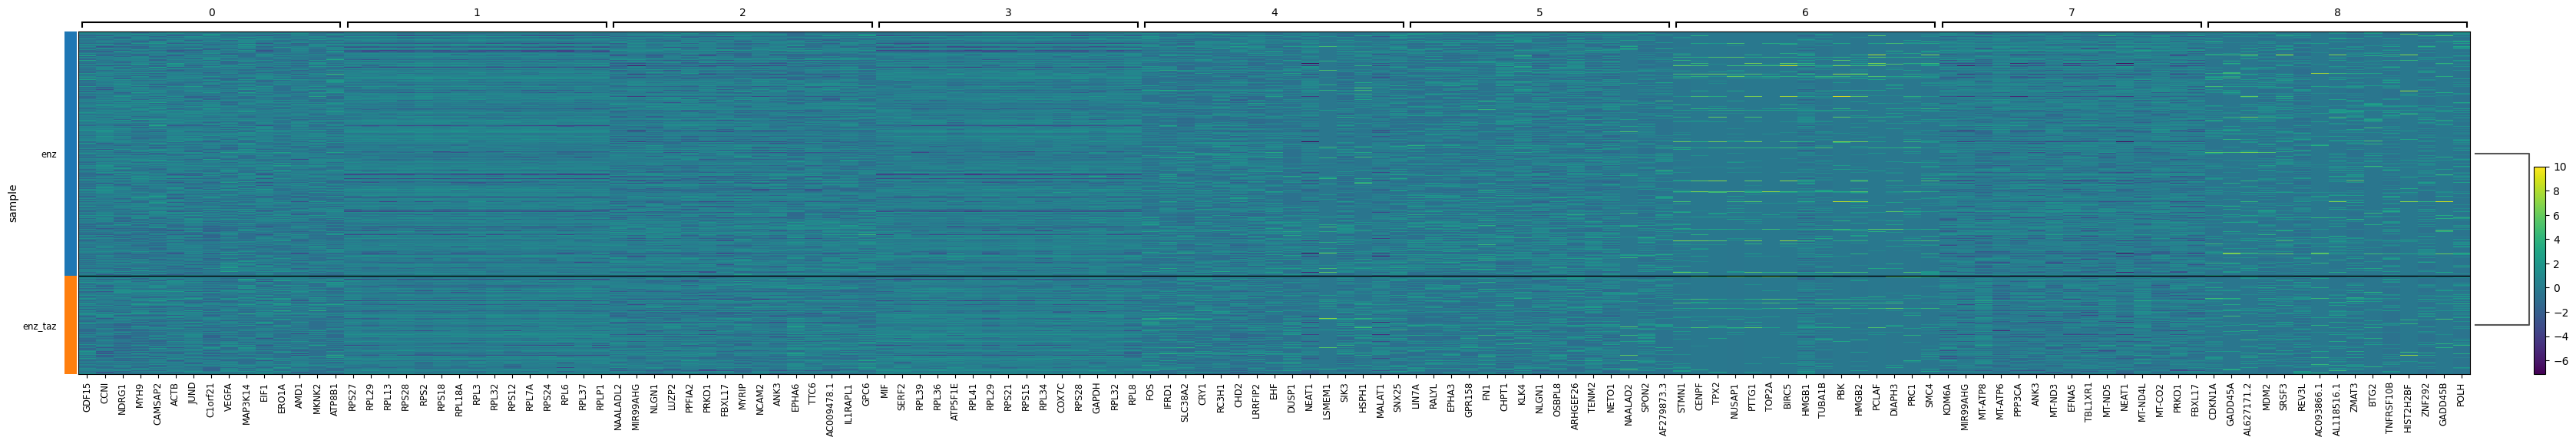

In [40]:
sc.pl.rank_genes_groups_heatmap(clusters, n_genes=15, key="t-test_ov", groupby="sample", show_gene_labels=True, save="_treatment.png")

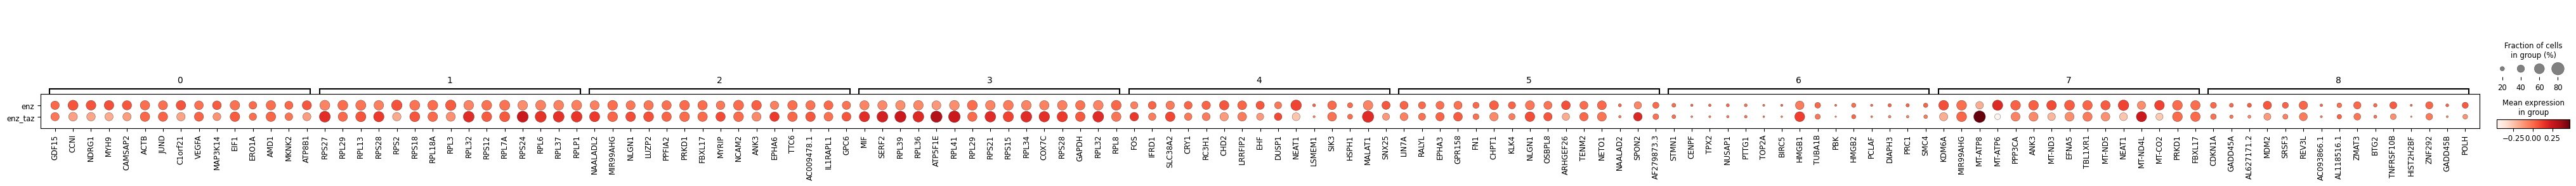

In [41]:
sc.pl.rank_genes_groups_dotplot(clusters, n_genes=15, key="t-test_ov", groupby="sample", save="_treatment.png")

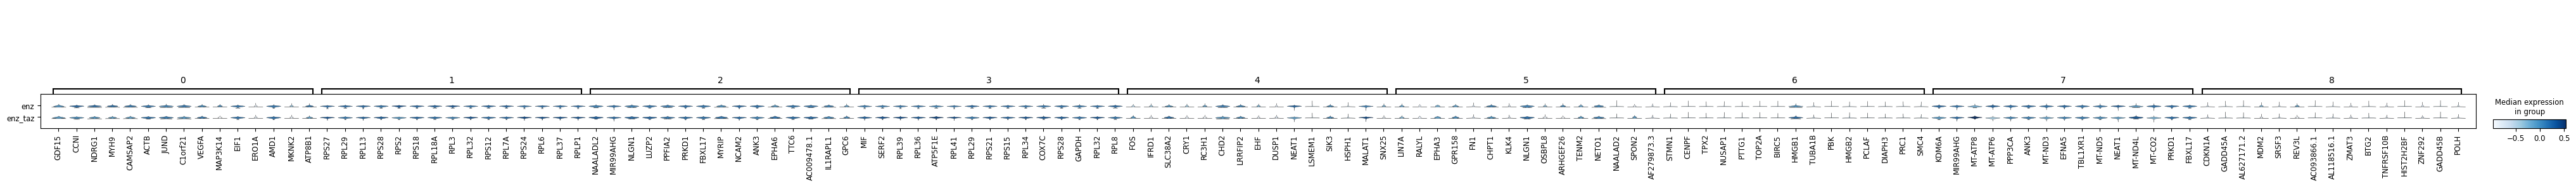

In [42]:
sc.pl.rank_genes_groups_stacked_violin(clusters, n_genes=15, key="t-test_ov", groupby="sample", save="_treatment.png")

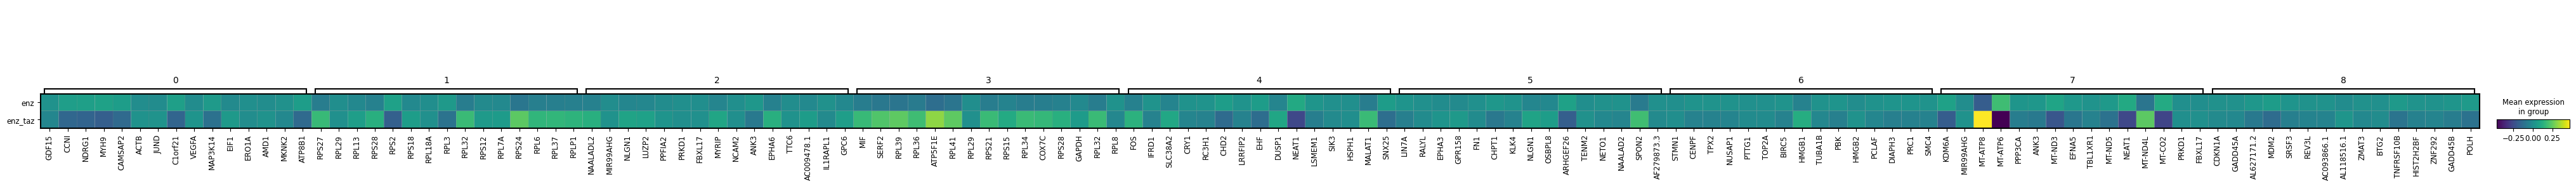

In [43]:
sc.pl.rank_genes_groups_matrixplot(clusters, n_genes=15, key="t-test_ov", groupby="sample", save="_treatment.png")

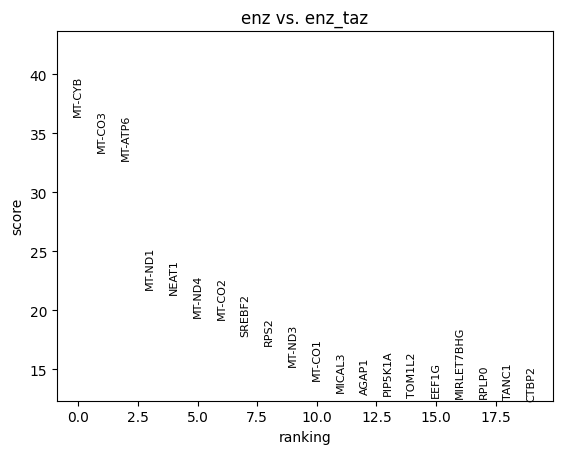

In [44]:
sc.tl.rank_genes_groups(clusters, 'sample', groups=['enz'], reference='enz_taz', method='wilcoxon')
sc.pl.rank_genes_groups(clusters, groups=['enz'], n_genes=20)

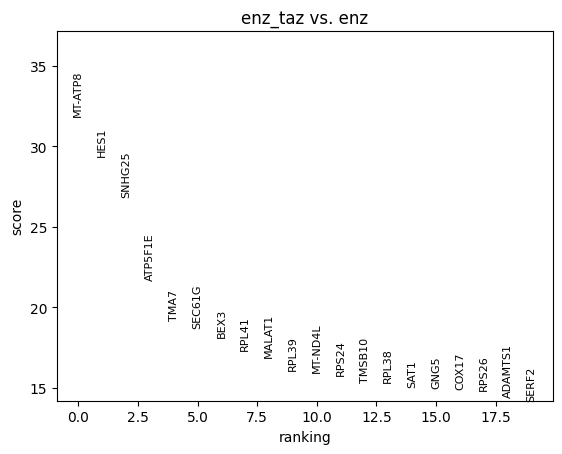

In [45]:
sc.tl.rank_genes_groups(clusters, 'sample', groups=['enz_taz'], reference='enz', method='wilcoxon')
sc.pl.rank_genes_groups(clusters, groups=['enz_taz'], n_genes=20)

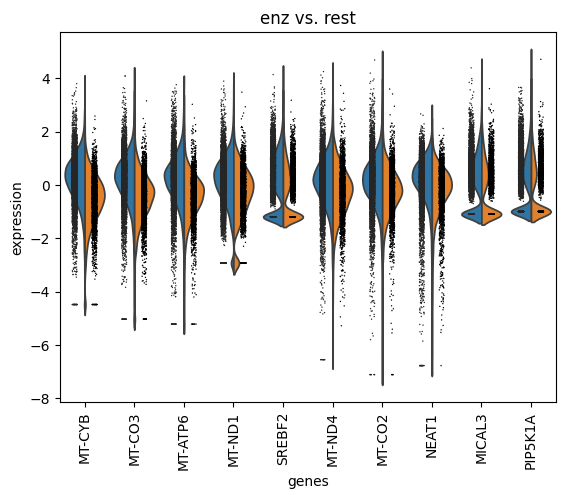

In [46]:
sc.pl.rank_genes_groups_violin(markers_genotype, groups='enz', n_genes=10)

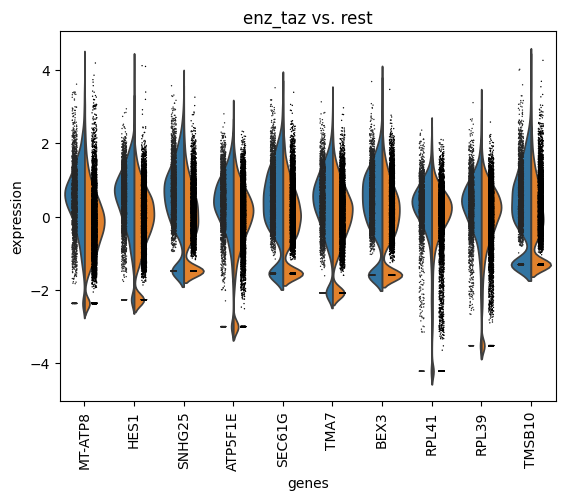

In [47]:
sc.pl.rank_genes_groups_violin(markers_genotype, groups='enz_taz', n_genes=10)

enz
enz_taz


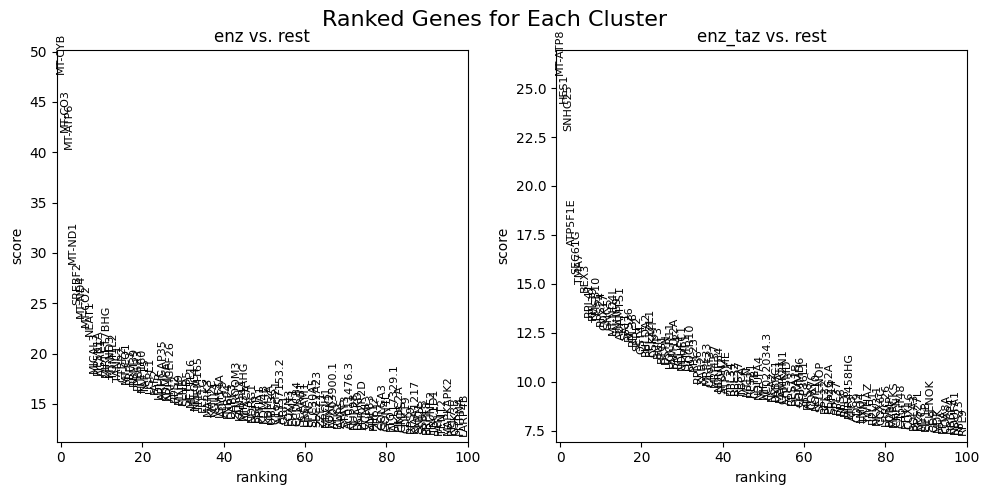

In [48]:
def plot_ranked_genes(df, title):    
    # Determine the number of clusters
    num_clusters = df['cluster'].nunique()
    
    # Determine the grid size
    nrows = int(math.ceil(num_clusters / 3))  # 3 plots per row, adjust as needed
    ncols = 3 if num_clusters > 3 else num_clusters
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # Plot each cluster
    for i, cluster in enumerate(set(genotype_marker_table['cluster'].tolist())):
        print(cluster)
        ax = axes[i]
        cluster_data = df[df['cluster'] == str(cluster)]
        
        # Plot the vertical gene labels
        for i, (gene, score) in enumerate(zip(cluster_data['genes'], cluster_data['scores'])):
            ax.text(i, score, gene, fontsize=8, rotation=90, ha='center', va='bottom')
        
        ax.set_title(f"{cluster} vs. rest")
        ax.set_xlabel('ranking')
        ax.set_ylabel('score')
        
        # Set limits and adjust the plot
        ax.set_xlim(-1, len(cluster_data))
        ax.set_ylim(min(cluster_data['scores']) * 0.95, max(cluster_data['scores']) * 1.05)
    
    # Remove any empty subplots
    for j in range(num_clusters, len(axes)):
        fig.delaxes(axes[j])
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the title
    plt.savefig('images/treatments/ranked_cluster_genes.png')
    plt.show()
    

plot_ranked_genes(genotype_marker_table, 'Ranked Genes for Each Cluster')

In [49]:
cluster_marker_table.index

RangeIndex(start=0, stop=900, step=1)

In [50]:
# Join two datasets

cluster_joined = pd.merge(cluster_marker_table, markers_cluster.var, left_on='genes', right_index=True)
genotype_joined = pd.merge(genotype_marker_table, markers_genotype.var, left_on='genes', right_index=True)

display(cluster_joined.head(5))
display(genotype_joined.head(5))

,cluster,rank,ref,genes,scores,logfoldchanges,pvals,pvals_adj,gene_ids,feature_types,...,log1p_total_counts,n_counts,n_cells,mito,highly_variable,means,dispersions,dispersions_norm,mean,std
0,0,0,rest,GDF15,19.109770,NaN,1.327581e-78,3.402855e-74,ENSG00000130513,Gene Expression,...,12.517333,273028.0,7390,False,True,1.931017,2.843869,4.565379,1.359067,1.028310
1,1,0,rest,RPS27,21.406527,NaN,5.631485e-94,7.217311e-90,ENSG00000177954,Gene Expression,...,13.254531,570649.0,9088,False,False,3.211323,2.074112,-0.109304,2.979470,0.828311
201,3,22,rest,RPS27,21.415337,NaN,2.919227e-88,1.969095e-85,ENSG00000177954,Gene Expression,...,13.254531,570649.0,9088,False,False,3.211323,2.074112,-0.109304,2.979470,0.828311
2,2,0,rest,NAALADL2,34.450089,NaN,3.221091e-218,8.256301e-214,ENSG00000177694,Gene Expression,...,11.996672,162213.0,8858,False,True,2.423408,2.097199,2.996909,2.090895,0.883752
349,7,38,rest,NAALADL2,10.046705,NaN,1.234509e-22,4.322806e-21,ENSG00000177694,Gene Expression,...,11.996672,162213.0,8858,False,True,2.423408,2.097199,2.996909,2.090895,0.883752


,cluster,rank,ref,genes,scores,logfoldchanges,pvals,pvals_adj,gene_ids,feature_types,...,log1p_total_counts,n_counts,n_cells,mito,highly_variable,means,dispersions,dispersions_norm,mean,std
0,enz,0,rest,MT-CYB,47.776749,NaN,0.000000e+00,0.000000e+00,ENSG00000198727,Gene Expression,...,12.943330,418038.0,9345,True,False,2.840271,1.845759,-0.436308,2.679812,0.597229
1,enz_taz,0,rest,MT-ATP8,25.665659,NaN,3.798794e-137,3.245689e-133,ENSG00000228253,Gene Expression,...,11.394671,88846.0,8999,True,True,1.936865,1.823674,1.626596,1.680932,0.711263
2,enz,1,rest,MT-CO3,41.992912,NaN,0.000000e+00,0.000000e+00,ENSG00000198938,Gene Expression,...,13.179020,529145.0,9353,True,False,3.100590,2.077597,0.459700,2.947254,0.585214
3,enz_taz,1,rest,HES1,24.220585,NaN,4.556179e-123,2.335679e-119,ENSG00000114315,Gene Expression,...,11.768389,129105.0,8650,False,True,1.994292,1.570523,0.897366,1.736512,0.767384
4,enz,2,rest,MT-ATP6,40.292767,NaN,0.000000e+00,0.000000e+00,ENSG00000198899,Gene Expression,...,13.484424,718142.0,9369,True,False,3.499385,2.768840,0.362143,3.313960,0.634594


In [51]:
# Cut columns from tables

cluster_markers_named = cluster_joined[['cluster', 'ref', 'rank', 'genes', 'scores', 'logfoldchanges', 'pvals', 'pvals_adj']]
genotype_markers_named = genotype_joined[['cluster', 'ref', 'rank', 'genes', 'scores', 'logfoldchanges', 'pvals', 'pvals_adj']]

display(cluster_markers_named.head(5))
display(genotype_markers_named.head(5))

,cluster,ref,rank,genes,scores,logfoldchanges,pvals,pvals_adj
0,0,rest,0,GDF15,19.109770,NaN,1.327581e-78,3.402855e-74
1,1,rest,0,RPS27,21.406527,NaN,5.631485e-94,7.217311e-90
201,3,rest,22,RPS27,21.415337,NaN,2.919227e-88,1.969095e-85
2,2,rest,0,NAALADL2,34.450089,NaN,3.221091e-218,8.256301e-214
349,7,rest,38,NAALADL2,10.046705,NaN,1.234509e-22,4.322806e-21


,cluster,ref,rank,genes,scores,logfoldchanges,pvals,pvals_adj
0,enz,rest,0,MT-CYB,47.776749,NaN,0.000000e+00,0.000000e+00
1,enz_taz,rest,0,MT-ATP8,25.665659,NaN,3.798794e-137,3.245689e-133
2,enz,rest,1,MT-CO3,41.992912,NaN,0.000000e+00,0.000000e+00
3,enz_taz,rest,1,HES1,24.220585,NaN,4.556179e-123,2.335679e-119
4,enz,rest,2,MT-ATP6,40.292767,NaN,0.000000e+00,0.000000e+00


In [52]:
sorted_markers = cluster_markers_named.sort_values(by='scores', ascending=False)

In [53]:
sorted_markers.head(100)

,cluster,ref,rank,genes,scores,logfoldchanges,pvals,pvals_adj
2,2,rest,0,NAALADL2,34.450089,NaN,3.221091e-218,8.256301e-214
6,6,rest,0,STMN1,33.299599,NaN,6.854875e-153,1.757042e-148
15,6,rest,1,CENPF,32.979473,NaN,1.585125e-139,2.031497e-135
24,6,rest,2,TPX2,32.493622,NaN,1.307094e-138,1.116781e-134
5,5,rest,0,LIN7A,31.358953,NaN,1.581769e-159,4.054390e-155
...,...,...,...,...,...,...,...,...
64,1,rest,7,RPL3,20.312351,NaN,3.267594e-86,1.046937e-82
83,2,rest,9,ANK3,20.279535,NaN,1.275304e-85,2.971689e-82
327,3,rest,36,RPL37,20.239847,NaN,1.087239e-80,5.066928e-78
339,6,rest,37,CDCA2,20.218887,NaN,2.094171e-70,1.219950e-67


In [54]:
top_markers = sorted_markers.head(100).genes.tolist()

In [55]:
marker_table = pd.DataFrame([top_markers[i:i + 5] for i in range(0, len(top_markers), 5)])
marker_table.to_excel('output.xlsx', header=False, index=False)

# Plot Embeddings

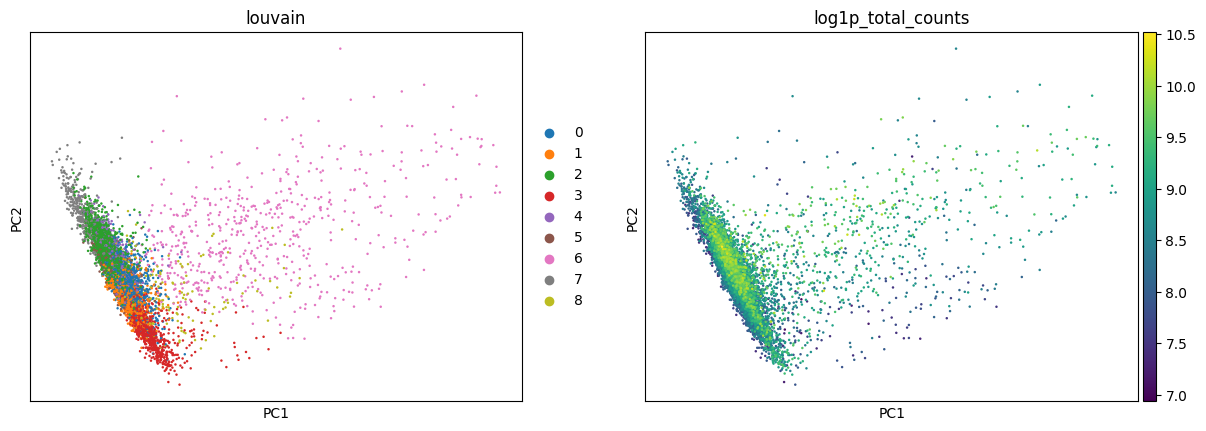

In [56]:
# PCA
sc.pl.embedding(
    markers_cluster,
    basis='pca',  
    color=['louvain','log1p_total_counts'],
    use_raw=False,
    save='.png'
)